In [7]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D, axes3d
import mglearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0, 0.5, 'Feature 1')

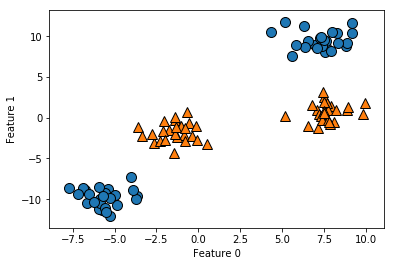

In [3]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



H:\Development\IntroToMLWithPython\IntroductionToMLWithPython\venv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

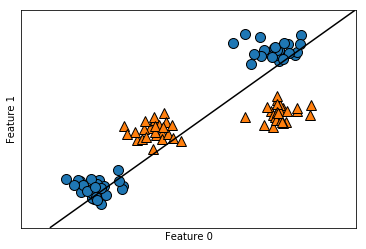

In [5]:
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0.5, 0, 'Feature 1 ** 2')

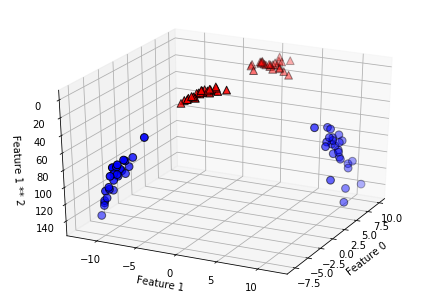

In [11]:
X_new = np.hstack([X, X[:, 1:] ** 2])

figure = plt.figure()

# Visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)

# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], 
           X_new[mask, 1], 
           X_new[mask, 2], 
           c='b', 
           cmap=mglearn.cm2, 
           s=60, 
           edgecolor='k')
ax.scatter(X_new[~mask, 0],
           X_new[~mask, 1],
           X_new[~mask, 2],
           c='r',
           marker='^',
           cmap=mglearn.cm2,
           s=60,
           edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

H:\Development\IntroToMLWithPython\IntroductionToMLWithPython\venv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, ' feature1 ** 2')

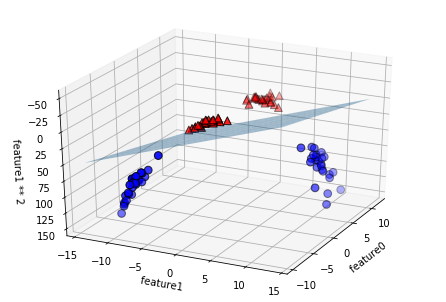

In [13]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.4)
ax.scatter(X_new[mask, 0],
           X_new[mask, 1],
           X_new[mask, 2],
           c='b',
           cmap=mglearn.cm2,
           s=60,
           edgecolor='k')
ax.scatter(X_new[~mask, 0],
           X_new[~mask, 1],
           X_new[~mask, 2],
           c='r',
           marker='^',
           cmap=mglearn.cm2,
           s=60,
           edgecolor='k')
ax.set_xlabel(" feature0")
ax.set_ylabel(" feature1")
ax.set_zlabel(" feature1 ** 2")




Text(0, 0.5, 'Feature 1')

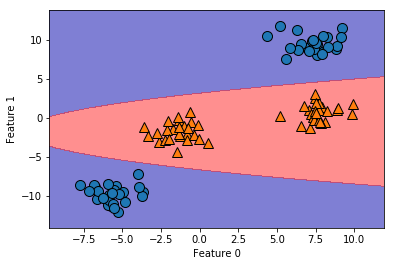

In [14]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),
                                            YY.ravel(),
                                            ZZ.ravel()])
plt.contourf(XX,
             YY,
             dec.reshape(XX.shape),
             levels=[dec.min(),
                     0,
                     dec.max()],
             cmap=mglearn.cm2,
             alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
